# Welcome to the course: Machine Learning with Spark (Session 5)

This course is offered by in collaboration of  [AI-LOUNG](http://ai-lounge.com/) & [Datafy2AI](https://www.datafy2ai.com/)

Instructor: [Dr. Muhammad Amjad Raza](https://www.linkedin.com/in/amjadraza/)

## Refresher:


1. [x]  What is Spark?
2. [x]  Setting Up Spark within Google Colab Environment
3. [x]  Basics of Spark Operations?
4. [x]  Spark DataFrame API using PySpark
5. [x] Basics of Machine Learning?
6. [x] DataPipelines with Spark
7. [x] Feature Engineering with Spark
8. [x] Feature Engineering with KOALAS
9. [x] Machine Leraning with Spark


## Learning Objective of this Session:

1. Getting Strated with Databricks
2. Loading Data Into Databricks and Create Tables for Persistence
3. Spark Example with Databricks 
4. **Machine Learning Pipeline with example**

# Problem: Financial Fraud Detection using Decision Tree Machine Learning Models

In this notebook, we will showcase the use of decision tree ML models to perform financial fraud detection.

<br/>

### Source Data
PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

This [synthetic dataset](https://www.kaggle.com/ntnu-testimon/paysim1) is scaled down 1/4 of the original dataset and it is created just for Kaggle.  To load the dataset yourself, please download it to your local machine from Kaggle and then import the data via **Import Data**: [Azure](https://docs.azuredatabricks.net/user-guide/importing-data.html#import-data) | [AWS](https://docs.databricks.com/user-guide/importing-data.html#import-data).

<br/>

### Dictionary
This is the column definition of the referenced sythentic dataset.

| Column Name | Description |
| ----------- | ----------- | 
| step | maps a unit of time in the real world. In this case 1 step is 1 hour of time.|
| type | CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER. |
| amount |  amount of the transaction in local currency. |
| nameOrig | customer who started the transaction |
| oldbalanceOrg | initial balance before the transaction |
| newbalanceOrig | new balance after the transaction |
| nameDest | customer who is the recipient of the transaction |
| oldbalanceDest | initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants). |
| newbalanceDest | new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants). |
<br/>

> This notebook is originally written by databricks team. We give due credit to the team databricks.

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
! pip install mlflow

Collecting mlflow
 Downloading mlflow-1.15.0-py3-none-any.whl (14.2 MB)
 | 10 kB 24.2 MB/s eta 0:00:01 | | 20 kB 12.7 MB/s eta 0:00:02 | | 30 kB 9.1 MB/s eta 0:00:02 | | 40 kB 6.1 MB/s eta 0:00:03 |▏ | 51 kB 7.3 MB/s eta 0:00:02 |▏ | 61 kB 8.0 MB/s eta 0:00:02 |▏ | 71 kB 8.3 MB/s eta 0:00:02 |▏ | 81 kB 8.6 MB/s eta 0:00:02 |▏ | 92 kB 6.7 MB/s eta 0:00:03 |▎ | 102 kB 7.0 MB/s eta 0:00:03 |▎ | 112 kB 7.0 MB/s eta 0:00:03 |▎ | 122 kB 7.0 MB/s eta 0:00:02 |▎ | 133 kB 7.0 MB/s eta 0:00:02 |▎ | 143 kB 7.0 MB/s eta 0:00:02 |▍ | 153 kB 7.0 MB/s eta 0:00:02 |▍ | 163 kB 7.0 MB/s eta 0:00:02 |▍ | 174 kB 7.0 MB/s eta 0:00:02 |▍ | 184 kB 7.0 MB/s eta 0:00:02 |▍ | 194 kB 7.0 MB/s eta 0:00:02 |▌ | 204 kB 7.0 MB/s eta 0:00:02 |▌ | 215 kB 7.0 MB/s eta 0:00:02 |▌ | 225 kB 7.0 MB/s eta 0:00:02 |▌ | 235 kB 7.0 MB/s eta 0:00:02 |▌ | 245 kB 7.0 MB/s eta 0:00:02 |▋ | 256 kB 7.0 MB/s eta 0:00:02 |▋ | 266 kB 7.0 MB/s eta 0:00:02 |▋ | 276 kB 7.0 MB/s eta 0:00:02 |▋ | 286 kB 7.0 MB/s eta 0:00:02 |▊ | 296 kB 7.0 MB/s eta 0:00:02 |▊ | 307 kB 7.0 MB/s eta 0:00:02 |▊ | 317 kB 7.0 MB/s eta 0:00:02 |▊ | 327 kB 7.0 MB/s eta 0:00:02 |▊ | 337 kB 7.0 MB/s eta 0:00:02 |▉ | 348 kB 7.0 MB/s eta 0:00:02 |▉ | 358 kB 7.0 MB/s eta 0:00:02 |▉ | 368 kB 7.0 MB/s eta 0:00:02 |▉ | 378 kB 7.0 MB/s eta 0:00:02 |▉ | 389 kB 7.0 MB/s eta 0:00:02 |█ | 399 kB 7.0 MB/s eta 0:00:02 |█ | 409 kB 7.0 MB/s eta 0:00:02 |█ | 419 kB 7.0 MB/s eta 0:00:02 |█ | 430 kB 7.0 MB/s eta 0:00:02 |█ | 440 kB 7.0 MB/s eta 0:00:02 |█ | 450 kB 7.0 MB/s eta 0:00:02 |█ | 460 kB 7.0 MB/s eta 0:00:02 |█ | 471 kB 7.0 MB/s eta 0:00:02 |█ | 481 kB 7.0 MB/s eta 0:00:02 |█ | 491 kB 7.0 MB/s eta 0:00:02 |█▏ | 501 kB 7.0 MB/s eta 0:00:02 |█▏ | 512 kB 7.0 MB/s eta 0:00:02 |█▏ | 522 kB 7.0 MB/s eta 0:00:02 |█▏ | 532 kB 7.0 MB/s eta 0:00:02 |█▎ | 542 kB 7.0 MB/s eta 0:00:02 |█▎ | 552 kB 7.0 MB/s eta 0:00:02 |█▎ | 563 kB 7.0 MB/s eta 0:00:02 |█▎ | 573 kB 7.0 MB/s eta 0:00:02 |█▎ | 583 kB 7.0 MB/s eta 0:00:02 |█▍ | 593 kB 7.0 MB/s eta 0:00:02 |█▍ | 604 kB 7.0 MB/s eta 0:00:02 |█▍ | 614 kB 7.0 MB/s eta 0:00:02 |█▍ | 624 kB 7.0 MB/s eta 0:00:02 |█▍ | 634 kB 7.0 MB/s eta 0:00:02 |█▌ | 645 kB 7.0 MB/s eta 0:00:02 |█▌ | 655 kB 7.0 MB/s eta 0:00:02 |█▌ | 665 kB 7.0 MB/s eta 0:00:02 |█▌ | 675 kB 7.0 MB/s eta 0:00:02 |█▌ | 686 kB 7.0 MB/s eta 0:00:02 |█▋ | 696 kB 7.0 MB/s eta 0:00:02 |█▋ | 706 kB 7.0 MB/s eta 0:00:02 |█▋ | 716 kB 7.0 MB/s eta 0:00:02 |█▋ | 727 kB 7.0 MB/s eta 0:00:02 |█▋ | 737 kB 7.0 MB/s eta 0:00:02 |█▊ | 747 kB 7.0 MB/s eta 0:00:02 |█▊ | 757 kB 7.0 MB/s eta 0:00:02 |█▊ | 768 kB 7.0 MB/s eta 0:00:02 |█▊ | 778 kB 7.0 MB/s eta 0:00:02 |█▉ | 788 kB 7.0 MB/s eta 0:00:02 |█▉ | 798 kB 7.0 MB/s eta 0:00:02 |█▉ | 808 kB 7.0 MB/s eta 0:00:02 |█▉ | 819 kB 7.0 MB/s eta 0:00:02 |█▉ | 829 kB 7.0 MB/s eta 0:00:02 |██ | 839 kB 7.0 MB/s eta 0:00:02 |██ | 849 kB 7.0 MB/s eta 0:00:02 |██ | 860 kB 7.0 MB/s eta 0:00:02 |██ | 870 kB 7.0 MB/s eta 0:00:02 |██ | 880 kB 7.0 MB/s eta 0:00:02 |██ | 890 kB 7.0 MB/s eta 0:00:02 |██ | 901 kB 7.0 MB/s eta 0:00:02 |██ | 911 kB 7.0 MB/s eta 0:00:02 |██ | 921 kB 7.0 MB/s eta 0:00:02 |██ | 931 kB 7.0 MB/s eta 0:00:02 |██▏ | 942 kB 7.0 MB/s eta 0:00:02 |██▏ | 952 kB 7.0 MB/s eta 0:00:02 |██▏ | 962 kB 7.0 MB/s eta 0:00:02 |██▏ | 972 kB 7.0 MB/s eta 0:00:02 |██▏ | 983 kB 7.0 MB/s eta 0:00:02 |██▎ | 993 kB 7.0 MB/s eta 0:00:02 |██▎ | 1.0 MB 7.0 MB/s eta 0:00:02 |██▎ | 1.0 MB 7.0 MB/s eta 0:00:02 |██▎ | 1.0 MB 7.0 MB/s eta 0:00:02 |██▍ | 1.0 MB 7.0 MB/s eta 0:00:02 |██▍ | 1.0 MB 7.0 MB/s eta 0:00:02 |██▍ | 1.1 MB 7.0 MB/s eta 0:00:02 |██▍ | 1.1 MB 7.0 MB/s eta 0:00:02 |██▍ | 1.1 MB 7.0 MB/s eta 0:00:02 |██▌ | 1.1 MB 7.0 MB/s eta 0:00:02 |██▌ | 1.1 MB 7.0 MB/s eta 0:00:02 |██▌ | 1.1 MB 7.0 MB/s eta 0:00:02 |██▌ | 1.1 MB 7.0 MB/s eta 0:00:02 |██▌ | 1.1 MB 7.0 MB/s eta 0:00:02 |██▋ | 1.1 MB 7.0 MB/s eta 0:00:02 |██▋ | 1.1 MB 7.0 MB/s eta 0:00:02 |██▋ | 1.2 MB 7.0 MB/s eta 0:00:02 |██▋ | 1.

In [0]:
# Configure MLflow Experiment
mlflow_experiment_id = 866112

# Including MLflow
import mlflow
import mlflow.spark

import os
print("MLflow Version: %s" % mlflow.__version__)

MLflow Version: 1.15.0

In [0]:
# File location and type
file_location = "/user/hive/warehouse/financial_fraud_data_v_0"
file_type = "parquet"

# Parquet options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
41,CASH_OUT,29177.54,C178421862,100249.0,71071.46,C671140271,194237.43,226407.64,0,0
41,PAYMENT,3516.64,C587874515,71071.46,67554.82,M1390128719,0.0,0.0,0,0
41,PAYMENT,9094.13,C687099084,1158.0,0.0,M919296004,0.0,0.0,0,0
41,PAYMENT,15400.11,C1203149526,50118.0,34717.89,M1217461689,0.0,0.0,0,0
41,PAYMENT,8546.34,C1116228171,34717.89,26171.55,M779034982,0.0,0.0,0,0
41,CASH_IN,25568.64,C1568435799,47.0,25615.64,C1359266146,0.0,0.0,0,0
41,CASH_IN,72805.26,C315501940,41251.0,114056.26,C1288839332,1.45E7,1.45E7,0,0
41,TRANSFER,448360.79,C311752564,41274.0,0.0,C1981739754,145694.46,594055.25,0,0
41,PAYMENT,8331.2,C1168605265,15156.0,6824.8,M2065125476,0.0,0.0,0,0
41,CASH_OUT,58900.19,C407988223,8048.0,0.0,C1546656945,919343.88,1016366.39,0,0


In [0]:
# File location and type
file_location = "/FileStore/tables/data_trimmed.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.0,0,0
1,PAYMENT,4024.36,C1265012928,2671.0,0.0,M1176932104,0.0,0.0,0,0
1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0


In [0]:
# Review the schema of your data 
df.printSchema()

root
-- step: integer (nullable = true)
-- type: string (nullable = true)
-- amount: double (nullable = true)
-- nameOrig: string (nullable = true)
-- oldbalanceOrg: double (nullable = true)
-- newbalanceOrig: double (nullable = true)
-- nameDest: string (nullable = true)
-- oldbalanceDest: double (nullable = true)
-- newbalanceDest: double (nullable = true)
-- isFraud: integer (nullable = true)
-- isFlaggedFraud: integer (nullable = true)

### Calculate Differences between Originating and Destination Balanaces
With the following PySpark DataFrame query, we will calculate the following columns:

| New Column | Definition |
| ---------- | ---------- |
| orgDiff | Difference between the originating balance |
| destDiff | Difference between the destination balance |

In [0]:
# Calculate the differences between originating and destination balances
df = df.withColumn("orgDiff", df.newbalanceOrig - df.oldbalanceOrg)\
       .withColumn("destDiff", df.newbalanceDest - df.oldbalanceDest)

# Create temporary view
df.createOrReplaceTempView("financials")

### Let's review the data and ask some simple questions

In [0]:
# Review the new table (including the origination and destiation differences)
display(df)

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgDiff,destDiff
41,CASH_OUT,29177.54,C178421862,100249.0,71071.46,C671140271,194237.43,226407.64,0,0,-29177.539999999994,32170.21000000002
41,PAYMENT,3516.64,C587874515,71071.46,67554.82,M1390128719,0.0,0.0,0,0,-3516.6399999999994,0.0
41,PAYMENT,9094.13,C687099084,1158.0,0.0,M919296004,0.0,0.0,0,0,-1158.0,0.0
41,PAYMENT,15400.11,C1203149526,50118.0,34717.89,M1217461689,0.0,0.0,0,0,-15400.11,0.0
41,PAYMENT,8546.34,C1116228171,34717.89,26171.55,M779034982,0.0,0.0,0,0,-8546.34,0.0
41,CASH_IN,25568.64,C1568435799,47.0,25615.64,C1359266146,0.0,0.0,0,0,25568.64,0.0
41,CASH_IN,72805.26,C315501940,41251.0,114056.26,C1288839332,1.45E7,1.45E7,0,0,72805.26,0.0
41,TRANSFER,448360.79,C311752564,41274.0,0.0,C1981739754,145694.46,594055.25,0,0,-41274.0,448360.79000000004
41,PAYMENT,8331.2,C1168605265,15156.0,6824.8,M2065125476,0.0,0.0,0,0,-8331.2,0.0
41,CASH_OUT,58900.19,C407988223,8048.0,0.0,C1546656945,919343.88,1016366.39,0,0,-8048.0,97022.51000000001


#### What are the type of transactions?

In [0]:
%sql
-- Organize by Type
select type, count(1) from financials group by type

type,count(1)
TRANSFER,86753
CASH_IN,227130
CASH_OUT,373641
PAYMENT,353873
DEBIT,7178


#### How much money are we talking about (synthetically)?

In [0]:
%sql
select type, sum(amount) from financials group by type

type,sum(amount)
TRANSFER,5.50364356741299E10
CASH_IN,3.859475828889005E10
CASH_OUT,6.876473738324011E10
PAYMENT,3.9360965221599927E9
DEBIT,4.219599495E7


## Rules-based Model: Create a set of rules to identify fraud based on known cases

The following `where` clause are a set of rules to identify know fraud-based cases using SQL; i.e. rules-based model.
* Often, financial fraud analytics start with with clauses like the `where` clause below
* Note, in reality, rules are often much larger and more complicated

In [0]:
from pyspark.sql import functions as F

# Rules to Identify Known Fraud-based
df = df.withColumn("label", 
                   F.when(
                     (
                       (df.oldbalanceOrg <= 56900) & (df.type == "TRANSFER") & (df.newbalanceDest <= 105)) | 
                       (
                         (df.oldbalanceOrg > 56900) & (df.newbalanceOrig <= 12)) | 
                           (
                             (df.oldbalanceOrg > 56900) & (df.newbalanceOrig > 12) & (df.amount > 1160000)
                           ), 1
                   ).otherwise(0))

# Calculate proportions
fraud_cases = df.filter(df.label == 1).count()
total_cases = df.count()
fraud_pct = 1.*fraud_cases/total_cases

# Provide quick statistics
print("Based on these rules, we have flagged %s (%s) fraud cases out of a total of %s cases." % (fraud_cases, fraud_pct, total_cases))

# Create temporary view to review data
df.createOrReplaceTempView("financials_labeled")

Based on these rules, we have flagged 44655 (0.042586367212645734) fraud cases out of a total of 1048575 cases.

### How much fraud are we talking about?
Based on the existing rules, while 4% of the transactions are fraudulent, it takes into account of the 11% of the total amount.

In [0]:
%sql
select label, count(1) as `Transactions`, sum(amount) as `Total Amount` from financials_labeled group by label

label,Transactions,Total Amount
1,44655,1.9712725866919994E10
0,1003920,1.4666149799644974E11


#### Top Origination / Destination Difference Pairs (>$1M TotalDestDiff)
Each bar represents a pair of entities performing a transaction

In [0]:
%sql
-- where sum(destDiff) >= 10000000.00
select nameOrig, nameDest, label, TotalOrgDiff, TotalDestDiff
  from (
     select nameOrig, nameDest, label, sum(OrgDiff) as TotalOrgDiff, sum(destDiff) as TotalDestDiff 
       from financials_labeled 
      group by nameOrig, nameDest, label 
     ) a
 where TotalDestDiff >= 1000000
 limit 100

nameOrig,nameDest,label,TotalOrgDiff,TotalDestDiff
C752686443,C1816757085,0,-51178.0,1049449.5099999998
C1034899044,C306206744,0,0.0,2308448.1800000006
C1337803451,C1778801068,0,0.0,3119804.99
C1570013189,C1945802665,1,-63916.0,1179067.2799999998
C1379731404,C413177525,0,0.0,2375262.37
C608080514,C2006081398,1,-101396.29,3208776.46
C1567963311,C1141049797,0,136177.75999999978,1243657.54
C582291919,C461640598,0,0.0,3333288.95
C689413511,C1988852187,0,0.0,1161908.05
C122861681,C1754722089,0,-22291.0,1512938.6399999997


### What type of transactions are associated with fraud?
Reviewing the rules-based model, it appears that most fraudulent transactions are in the category of `Transfer` and `Cash_Out`.

In [0]:
%sql
select type, label, count(1) as `Transactions` from financials_labeled group by type, label

type,label,Transactions
PAYMENT,0,353862
CASH_OUT,0,341648
DEBIT,1,7
TRANSFER,1,12632
CASH_OUT,1,31993
DEBIT,0,7171
CASH_IN,0,227118
TRANSFER,0,74121
CASH_IN,1,12
PAYMENT,1,11


# Rules vs. ML model
Instead of creating specific rules that will change over time, can we be more precise and go to production faster by creating a ML model?

## Decision Trees

[Decision trees](http://en.wikipedia.org/wiki/Decision_tree_learning) and their ensembles are popular methods for the machine learning tasks of classification and regression. Decision trees are widely used since they are easy to interpret, handle categorical features, extend to the multiclass classification setting, do not require feature scaling, and are able to capture non-linearities and feature interactions. Tree ensemble algorithms such as random forests and boosting are among the top performers for classification and regression tasks.  

Because of these facets, decision trees often perform well on top of rules-based models and are often a good starting point for fraud detection.

![](http://cdn.iopscience.com/images/1749-4699/5/1/015004/Full/csd422281fig1.jpg)

Source: [The Wise Old Tree](https://pallav-routh.netlify.com/post/the-wise-old-tree/)

### Create training and test datasets
To build and validate our generalized fraud ML model, we will initially split the data using `randomSplit` to create our training and test datasets.

In [0]:
# Initially split our dataset between training and test datasets
(train, test) = df.randomSplit([0.8, 0.2], seed=12345)

# Cache the training and test datasets
train.cache()
test.cache()

# Print out dataset counts
print("Total rows: %s, Training rows: %s, Test rows: %s" % (df.count(), train.count(), test.count()))

Total rows: 1048575, Training rows: 838931, Test rows: 209644

### Create ML Pipeline
When creating an ML model, there are typically a set of repeated steps (e.g. `StringIndexer`, `VectorAssembler`, etc.).  By creating a ML pipeline, we can reuse this pipeline (and all of its steps) to retrain on a new and/or updated dataset.

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier

# Encodes a string column of labels to a column of label indices
indexer = StringIndexer(inputCol = "type", outputCol = "typeIndexed")

# VectorAssembler is a transformer that combines a given list of columns into a single vector column
va = VectorAssembler(inputCols = ["typeIndexed", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "orgDiff", "destDiff"], outputCol = "features")

# Using the DecisionTree classifier model
dt = DecisionTreeClassifier(labelCol = "label", featuresCol = "features", seed = 54321, maxDepth = 5)

# Create our pipeline stages
pipeline = Pipeline(stages=[indexer, va, dt])

In [0]:
import pyspark
print(pyspark.__version__)

3.1.0.dev0

In [0]:
# View the Decision Tree model (prior to CrossValidator)
dt_model = pipeline.fit(train)
display(dt_model.stages[-1])

treeNode
"{""index"":11,""featureType"":""continuous"",""prediction"":null,""threshold"":-62778.965,""categories"":null,""feature"":6,""overflow"":false}"
"{""index"":1,""featureType"":""continuous"",""prediction"":null,""threshold"":5.425,""categories"":null,""feature"":3,""overflow"":false}"
"{""index"":0,""featureType"":null,""prediction"":1.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":3,""featureType"":""continuous"",""prediction"":null,""threshold"":683116.6100000001,""categories"":null,""feature"":1,""overflow"":false}"
"{""index"":2,""featureType"":null,""prediction"":0.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":7,""featureType"":""continuous"",""prediction"":null,""threshold"":1078743.8599999999,""categories"":null,""feature"":7,""overflow"":false}"
"{""index"":5,""featureType"":""continuous"",""prediction"":null,""threshold"":8688684.08,""categories"":null,""feature"":2,""overflow"":false}"
"{""index"":4,""featureType"":null,""prediction"":0.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":6,""featureType"":null,""prediction"":1.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":9,""featureType"":""continuous"",""prediction"":null,""threshold"":2402966.7649999997,""categories"":null,""feature"":2,""overflow"":false}"


### Use BinaryClassificationEvaluator
Determine the accuracy of the model by reviewing the `areaUnderPR` and `areaUnderROC`

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Use BinaryClassificationEvaluator to evaluate our model
evaluatorPR = BinaryClassificationEvaluator(labelCol = "label", rawPredictionCol = "prediction", metricName = "areaUnderPR")
evaluatorAUC = BinaryClassificationEvaluator(labelCol = "label", rawPredictionCol = "prediction", metricName = "areaUnderROC")

### Setup CrossValidation
To try out different parameters to potentially improve our model, we will use `CrossValidator` in conjunction with the `ParamGridBuilder` to automate trying out different parameters.

Note, we are using `evaluatorPR` as our `evaluator` as the Precision-Recall curve is often better for an unbalanced distribution.

In [0]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Build the grid of different parameters
paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5,]) \
    .addGrid(dt.maxBins, [10, 20]) \
    .build()

# Build out the cross validation
crossval = CrossValidator(estimator = dt,
                          estimatorParamMaps = paramGrid,
                          evaluator = evaluatorPR,
                          numFolds = 3)  

pipelineCV = Pipeline(stages=[indexer, va, crossval])

# Train the model using the pipeline, parameter grid, and preceding BinaryClassificationEvaluator
cvModel_u = pipelineCV.fit(train)

MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.

### Review Results
Review the `areaUnderPR` (area under Precision Recall curve) and `areaUnderROC` (area under Receiver operating characteristic) or `AUC` (area under curve) metrics.

In [0]:
# Build the best model (training and test datasets)
train_pred = cvModel_u.transform(train)
test_pred = cvModel_u.transform(test)

# Evaluate the model on training datasets
pr_train = evaluatorPR.evaluate(train_pred)
auc_train = evaluatorAUC.evaluate(train_pred)

# Evaluate the model on test datasets
pr_test = evaluatorPR.evaluate(test_pred)
auc_test = evaluatorAUC.evaluate(test_pred)

# Print out the PR and AUC values
print("PR train:", pr_train)
print("AUC train:", auc_train)
print("PR test:", pr_test)
print("AUC test:", auc_test)

PR train: 0.8881442071341753
AUC train: 0.9967505976052338
PR test: 0.8827110053384483
AUC test: 0.996719473706021

### Confusion Matrix Code-base
Subsequent cells will be using the following code to plot the confusion matrix.

In [0]:
# Create confusion matrix template
from pyspark.sql.functions import lit, expr, col, column

# Confusion matrix template
cmt = spark.createDataFrame([(1, 0), (0, 0), (1, 1), (0, 1)], ["label", "prediction"])
cmt.createOrReplaceTempView("cmt")

In [0]:
# Source code for plotting confusion matrix is based on `plot_confusion_matrix` 
# via https://runawayhorse001.github.io/LearningApacheSpark/classification.html#decision-tree-classification
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, title):
  # Clear Plot
  plt.gcf().clear()

  # Configure figure
  fig = plt.figure(1)
  
  # Configure plot
  classes = ['Fraud', 'No Fraud']
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  # Normalize and establish threshold
  normalize=False
  fmt = 'd'
  thresh = cm.max() / 2.

  # Iterate through the confusion matrix cells
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  # Final plot configurations
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label') 
  
  # Display images
  image = fig
  
  # Show plot
  #fig = plt.show()
  
  # Save plot
  fig.savefig("confusion-matrix.png")

  # Display Plot
  display(image)
  
  # Close Plot
  plt.close(fig)

In [0]:
# Create temporary view for test predictions
test_pred.createOrReplaceTempView("test_pred")

# Create test predictions confusion matrix
test_pred_cmdf = spark.sql("select a.label, a.prediction, coalesce(b.count, 0) as count from cmt a left outer join (select label, prediction, count(1) as count from test_pred group by label, prediction) b on b.label = a.label and b.prediction = a.prediction order by a.label desc, a.prediction desc")

# View confusion matrix
display(test_pred_cmdf)

label,prediction,count
1,1,8920
1,0,6
0,1,1182
0,0,199536


### View Confusion Matrix
Let's use `matplotlib` and `pandas` to visualize our confusion matrix

In [0]:
# Convert to pandas
cm_pdf = test_pred_cmdf.toPandas()

# Create 1d numpy array of confusion matrix values
cm_1d = cm_pdf.iloc[:, 2]

# Create 2d numpy array of confusion matrix values
cm = np.reshape(cm_pdf['count'].values, (-1, 2))

# Print out the 2d array
print(cm)

[[ 8920 6]
 [ 1182 199536]]

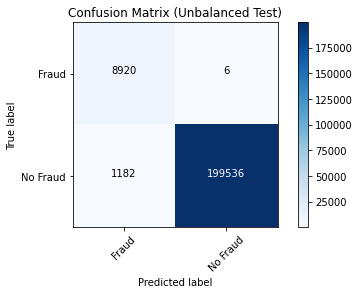

In [0]:
2# Plot confusion matrix  
plot_confusion_matrix(cm, "Confusion Matrix (Unbalanced Test)")

## Model with Balanced classes

Let's see if we can improve our decision tree model but balancing the Fraud vs. No Fraud cases. We will tune the model using the metrics `areaUnderROC` or (AUC)

In [0]:
# Reset the DataFrames for no fraud (`dfn`) and fraud (`dfy`)
dfn = train.filter(train.label == 0)
dfy = train.filter(train.label == 1)

# Calculate summary metrics
N = train.count()
y = dfy.count()
p = y/N

# Create a more balanced training dataset
train_b = dfn.sample(False, p, seed = 92285).union(dfy)

# Print out metrics
print("Total count: %s, Fraud cases count: %s, Proportion of fraud cases: %s" % (N, y, p))
print("Balanced training dataset count: %s" % train_b.count())

Total count: 838931, Fraud cases count: 35729, Proportion of fraud cases: 0.04258872302966513
Balanced training dataset count: 69965

In [0]:
# Display our more balanced training dataset
display(train_b.groupBy("label").count())

label,count
0,34236
1,35729


### Update ML pipeline
Because we had created the ML pipeline stages in the previous cells, we can re-use them to execute it against our balanced dataset.

Note, we are using `evaluatorAUC` as our `evaluator` as this is often better for a balanced distribution.

In [0]:
# Re-run the same ML pipeline (including parameters grid)
crossval_b = CrossValidator(estimator = dt,
                          estimatorParamMaps = paramGrid,
                          evaluator = evaluatorAUC,
                          numFolds = 3)  

pipelineCV_b = Pipeline(stages=[indexer, va, crossval_b])

# Train the model using the pipeline, parameter grid, and BinaryClassificationEvaluator using the `train_b` dataset
cvModel_b = pipelineCV_b.fit(train_b)

MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.

In [0]:
# Build the best model (balanced training and full test datasets)
train_pred_b = cvModel_b.transform(train_b)
test_pred_b = cvModel_b.transform(test)

# Evaluate the model on the balanced training datasets
pr_train_b = evaluatorPR.evaluate(train_pred_b)
auc_train_b = evaluatorAUC.evaluate(train_pred_b)

# Evaluate the model on full test datasets
pr_test_b = evaluatorPR.evaluate(test_pred_b)
auc_test_b = evaluatorAUC.evaluate(test_pred_b)

# Print out the PR and AUC values
print("PR train:", pr_train_b)
print("AUC train:", auc_train_b)
print("PR test:", pr_test_b)
print("AUC test:", auc_test_b)

PR train: 0.9991051704370684
AUC train: 0.9995326556840752
PR test: 0.9755191256830601
AUC test: 0.9994420032084815

In [0]:
# Create temporary view for test predictions
test_pred_b.createOrReplaceTempView("test_pred_b")

# Create test predictions confusion matrix
test_pred_b_cmdf = spark.sql("select a.label, a.prediction, coalesce(b.count, 0) as count from cmt a left outer join (select label, prediction, count(1) as count from test_pred_b group by label, prediction) b on b.label = a.label and b.prediction = a.prediction order by a.label desc, a.prediction desc")

# View confusion matrix
display(test_pred_b_cmdf)

label,prediction,count
1,1,8926
1,0,0
0,1,224
0,0,200494


In [0]:
# Convert to pandas
cm_b_pdf = test_pred_b_cmdf.toPandas()

# Create 1d numpy array of confusion matrix values
cm_b_1d = cm_b_pdf.iloc[:, 2]

# Create 2d numpy array of confusion matrix vlaues
cm_b = np.reshape(cm_b_pdf['count'].values, (-1, 2))

# Print out the 2d array
print(cm_b)

[[ 8926 0]
 [ 224 200494]]

## View Decision Tree Models
Visually compare the differences between the **unbalanced** and **balanced** decision tree models (basd on the `train` and `train_b` datasets respectively).

In [0]:
# Extract Feature Importance
#  Attribution: Feature Selection Using Feature Importance Score - Creating a PySpark Estimator
#               https://www.timlrx.com/2018/06/19/feature-selection-using-feature-importance-score-creating-a-pyspark-estimator/
import pandas as pd

def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))

In [0]:
# View the Unbalanced Decision Tree model (prior to CrossValidator)
dt_model = pipeline.fit(train)
display(dt_model.stages[-1])

treeNode
"{""index"":11,""featureType"":""continuous"",""prediction"":null,""threshold"":-62778.965,""categories"":null,""feature"":6,""overflow"":false}"
"{""index"":1,""featureType"":""continuous"",""prediction"":null,""threshold"":5.425,""categories"":null,""feature"":3,""overflow"":false}"
"{""index"":0,""featureType"":null,""prediction"":1.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":3,""featureType"":""continuous"",""prediction"":null,""threshold"":683116.6100000001,""categories"":null,""feature"":1,""overflow"":false}"
"{""index"":2,""featureType"":null,""prediction"":0.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":7,""featureType"":""continuous"",""prediction"":null,""threshold"":1078743.8599999999,""categories"":null,""feature"":7,""overflow"":false}"
"{""index"":5,""featureType"":""continuous"",""prediction"":null,""threshold"":8688684.08,""categories"":null,""feature"":2,""overflow"":false}"
"{""index"":4,""featureType"":null,""prediction"":0.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":6,""featureType"":null,""prediction"":1.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":9,""featureType"":""continuous"",""prediction"":null,""threshold"":2402966.7649999997,""categories"":null,""feature"":2,""overflow"":false}"


In [0]:
# Extract Feature Importance for the original unbalanced dt_model
ExtractFeatureImp(dt_model.stages[-1].featureImportances, train_pred, "features").head(10)

Out[91]:

,idx,name,vals,score
5,6,orgDiff,NaN,0.546659
2,3,newbalanceOrig,NaN,0.421376
1,2,oldbalanceOrg,NaN,0.015356
4,5,newbalanceDest,NaN,0.014025
7,0,typeIndexed,"[CASH_OUT, PAYMENT, CASH_IN, TRANSFER, DEBIT]",0.001418
0,1,amount,NaN,0.000779
6,7,destDiff,NaN,0.000387
3,4,oldbalanceDest,NaN,0.000000


In [0]:
# View the Balanced Decision Tree model (prior to CrossValidator)
dt_model_b = pipeline.fit(train_b)
display(dt_model_b.stages[-1])

treeNode
"{""index"":5,""featureType"":""continuous"",""prediction"":null,""threshold"":-59580.0,""categories"":null,""feature"":6,""overflow"":false}"
"{""index"":1,""featureType"":""continuous"",""prediction"":null,""threshold"":30.435,""categories"":null,""feature"":3,""overflow"":false}"
"{""index"":0,""featureType"":null,""prediction"":1.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":3,""featureType"":""continuous"",""prediction"":null,""threshold"":921959.065,""categories"":null,""feature"":1,""overflow"":false}"
"{""index"":2,""featureType"":null,""prediction"":0.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":4,""featureType"":null,""prediction"":1.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":15,""featureType"":""continuous"",""prediction"":null,""threshold"":-34813.5,""categories"":null,""feature"":6,""overflow"":false}"
"{""index"":11,""featureType"":""continuous"",""prediction"":null,""threshold"":51425.5,""categories"":null,""feature"":2,""overflow"":false}"
"{""index"":9,""featureType"":""continuous"",""prediction"":null,""threshold"":247.12,""categories"":null,""feature"":5,""overflow"":false}"
"{""index"":7,""featureType"":""categorical"",""prediction"":null,""threshold"":null,""categories"":[0.0,2.0],""feature"":0,""overflow"":false}"


In [0]:
# Extract Feature Importance for the nbalanced dt_model
ExtractFeatureImp(dt_model_b.stages[-1].featureImportances, train_pred_b, "features").head(10)

Out[93]:

,idx,name,vals,score
5,6,orgDiff,NaN,0.894206
2,3,newbalanceOrig,NaN,0.062516
4,5,newbalanceDest,NaN,0.024065
1,2,oldbalanceOrg,NaN,0.010293
7,0,typeIndexed,"[CASH_OUT, TRANSFER, PAYMENT, CASH_IN, DEBIT]",0.005331
0,1,amount,NaN,0.003589
3,4,oldbalanceDest,NaN,0.000000
6,7,destDiff,NaN,0.000000


## Comparing Confusion Matrices
Below we will compare the unbalanced and balanced decision tree ML model confusion matrices.

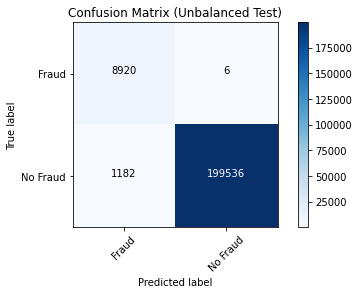

In [0]:
# Plot confusion matrix  
plot_confusion_matrix(cm, "Confusion Matrix (Unbalanced Test)")

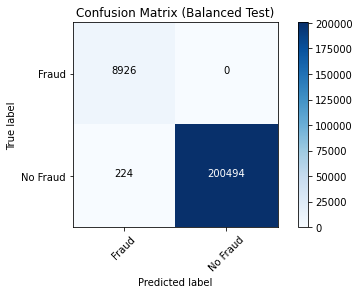

In [0]:
# Plot confusion matrix  
plot_confusion_matrix(cm_b, "Confusion Matrix (Balanced Test)")

### Observation

There is a significant difference for the `PR` and `AUC` values when comparing the unbalanced vs. balanced decision tree models.

| Metric/dataset | Unbalanced | Balanced |
| -------------- | ---------- | -------- |
| PR train | 0.9537894984523128 | 0.999629161563572 |
| AUC train | 0.998647996459481 | 0.9998071389056655 |
| PR test | 0.9539170535377599 | 0.9904709171789063 |
| AUC test | 0.9984378183482442 | 0.9997903902204509 |